# Anomaly Detection

**Project Overview** <br>
Implement and understand the application of a number of outlier/anomaly detection algorithms

**Project Aim** <br>
- The purpose of this project is to solve a classification problem in relation to anomaly detection
- The objective of the network optimization team is to analyze traces of past activity, which will be used to train an ML system capable of classifying samples of current activity as:
    - 0 (normal): current activity corresponds to normal behavior of any working day. Therefore, no reconfiguration or redistribution of resources is needed.
    - 1 (unusual): current activity slightly differs from the behavior usually observed for that time of the day (e.g. due to a strike, demonstration, sports event, etc.), which should trigger a reconfiguration of the base station.
    
**Project Value**
- Target Benefits: Why are we doing this project and where is the value?
- Business Needs
    - Identifying all of the available benefits (not just ‘enough benefits’ to get the project approved)
    - Defining specific measurable end states—the desired business outcomes—that need to be achieved in the business for the benefits to be delivered in full (filling the ‘gap’)
    - Maximizing and then quantifying all of the available financial benefits
    - Identifying the change activities required to deliver these outcomes, benefits and value.

**Data** <br>
https://www.kaggle.com/c/anomaly-detection-in-cellular-networks/data
https://towardsdatascience.com/adrepository-anomaly-detection-datasets-with-real-anomalies-2ee218f76292

During two weeks, different metrics were gathered from a set of 10 base stations, each having a different number of cells, every 15 minutes

The dataset is split into training (approx. 80%) and test (approx. 20%) subsets provided as two separate CSV files
- The training set: ML-MATT-CompetitionQT1920_train.csv contains 36,904 samples, each having 13 features and a label. <u>Note that there may be erroneous samples and outliers.</u>
- The test set: ML-MATT-CompetitionQT1920_test.csv contains 9,158 samples following the same structure as the training set but not including the labels.

- Column Definitions
    - Time : hour of the day (in the format hh:mm) when the sample was generated.
    - CellName1: text string used to uniquely identify the cell that generated the current sample. CellName is in the form xαLTE, where x identifies the base station, and α the cell within that base station (see the example in the right figure).
    - PRBUsageUL and PRBUsageDL: level of resource utilization in that cell measured as the portion of Physical Radio Blocks (PRB) that were in use (%) in the previous 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
    - meanThrDL and meanThrUL: average carried traffic (in Mbps) during the past 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
    - maxThrDL and maxThrUL: maximum carried traffic (in Mbps) measured in the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
    - meanUEDL and meanUEUL: average number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
    - maxUEDL and maxUEUL: maximum number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
    - maxUE_UL+DL: maximum number of user equipment (UE) devices that were active simultaneously in the last 15 minutes, regardless of UL and DL.
    - Unusual: labels for supervised learning. A value of 0 determines that the sample corresponds to normal operation, a value of 1 identifies unusual behavior.


**Scope**
- Implement statistical imputation measures using SimpleImputer from Sklearn

**Algorithms to Implement** <br>
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
- DBSCAN
- Isolation Forests
- Local Outlier Factor
- Minimum Covariance Determinant (Elliptic Envelope)
- One-Class Support Vector Machines


**Plot Results and Decision Boundaries and comment on behaviour**


**Loss Functions to Consider**
- Accuracy
- Log-Loss (https://towardsdatascience.com/the-most-awesome-loss-function-172ffc106c99)


**Benchmark Perfomance**
- Top 10: 0.99244
- Top 20: 0.88193
- Worst: 0.41447

**Resources - Exploratory Data Analysis** <br>
~~https://towardsdatascience.com/organize-your-data-and-models-using-the-object-oriented-programming-and-pickle-876a6654494 ~~<br>
~~https://www.brighthubpm.com/project-planning/128738-are-your-projects-delivering-business-value/~~ <br>

**Resources - Anomaly Detection** <br>
Andew Ng - Machine Learning Tutorials (YouTube) <br>
~~Multivariate Unsupervised Machine Learning for Anomaly Detection in Enterprise Applications.pdf~~ <br>
~~https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/~~ <br>
~~https://www.bmc.com/blogs/outlier-and-anomaly-detection/~~ <br>
~~https://machinelearningmastery.com/one-class-classification-algorithms/~~ <br>
~~https://medium.com/sciforce/anomaly-detection-another-challenge-for-artificial-intelligence-c69d414b14db~~ <br>
~~https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf~~ <br>
~~https://towardsdatascience.com/detecting-weird-data-conformal-anomaly-detection-20afb36c7bcd~~ <br>
~~https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/~~ <br>
~~https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8~~ <br>
~~https://towardsdatascience.com/unsupervised-machine-learning-approaches-for-outlier-detection-in-time-series-using-python-5759c6394e19~~ <br>
~~https://medium.com/pinterest-engineering/building-a-real-time-anomaly-detection-system-for-time-series-at-pinterest-a833e6856ddd~~ <br>
~~https://towardsdatascience.com/identifying-outliers-with-local-outlier-probabilities-2b5781e86e01#:~:text=By%20comparing%20the%20local%20density,to%20their%20Local%20Outlier%20Probability.~~ <br>

In [1]:
#!pip install --upgrade pip
#!pip install watermark
#!pip install -e git+https://github.com/rasbt/watermark#egg=watermark
#!pip install seaborn
#!pip install markdown-checklist

In [2]:
%load_ext autoreload
%autoreload 2
%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs


In [25]:
import os
import markdown

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

# Watermark modules
# import watermark
# import scipy as sp
# from sklearn import metrics
# import numpy.linalg as linalg

In [4]:
train_df = pd.read_csv('/Users/Rej1992/Documents/AnomalieDetectionMethods_RawData/ML-MATT-CompetitionQT1920_train.csv')
test_df = pd.read_csv('/Users/Rej1992/Documents/AnomalieDetectionMethods_RawData/ML-MATT-CompetitionQT1920_test.csv')

## Data Preprocessing

In [5]:
def duplicated_indicies(data):
    
    ''' This function returns the number of row index for duplicated elements '''
    
    return data[data.duplicated()].index


def determine_class_imbalance(data, col):
    
    ''' This function determines the class imbalace associated with the target class '''
    
    return data[col].value_counts()


def correct_category_datatype(data, cols):
    
    ''' This function corrects category type variables'''
    
    return data[cols].astype('category')


**Generic Data Overview**

In [6]:
print('Columns not shared across train/test dataset : {}'.format(set(train_df.columns) - set(test_df.columns)))

Columns not shared across train/test dataset : {'Unusual'}


In [7]:
print('The train/test split for data : {} '.format(round(len(test_df)/len(train_df),2)))

The train/test split for data : 0.25 


In [8]:
print('Training Dataframe dimensions {}'.format(train_df.shape))
print('Training Dataframe dimensions {}'.format(test_df.shape))

Training Dataframe dimensions (36904, 14)
Training Dataframe dimensions (9158, 13)


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   PRBUsageUL   36904 non-null  float64
 3   PRBUsageDL   36904 non-null  float64
 4   meanThr_DL   36904 non-null  float64
 5   meanThr_UL   36904 non-null  float64
 6   maxThr_DL    36904 non-null  float64
 7   maxThr_UL    36904 non-null  float64
 8   meanUE_DL    36904 non-null  float64
 9   meanUE_UL    36904 non-null  float64
 10  maxUE_DL     36815 non-null  float64
 11  maxUE_UL     36815 non-null  float64
 12  maxUE_UL+DL  36899 non-null  object 
 13  Unusual      36904 non-null  int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 3.9+ MB


**Helper Functions**

In [10]:
print('Duplicated Rows :', len(duplicated_indicies(train_df)))

Duplicated Rows : 106


In [11]:
determine_class_imbalance(train_df, 'Unusual')

0    26721
1    10183
Name: Unusual, dtype: int64

In [12]:
train_df[['CellName', 'maxUE_UL+DL']] = correct_category_datatype(train_df, ['CellName', 'maxUE_UL+DL'])

In [13]:
train_df.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,09:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,07:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,02:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,03:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0


In [14]:
train_df.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
count,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36815.000000,36815.000000,36904.000000
mean,7.835090,2.106396,0.560525,0.067610,17.764369,1.791974,1.173441,0.665143,4.190819,3.063371,0.275932
std,8.428206,2.247514,0.727623,0.186555,15.739932,5.028928,0.214065,0.535493,1.772484,1.387446,0.446989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.140000,0.021000,5.710750,0.362000,1.041000,0.010000,3.000000,2.000000,0.000000
50%,4.547000,1.314000,0.352000,0.040000,14.170000,0.703000,1.112000,1.011000,4.000000,3.000000,0.000000
75%,12.126000,2.728000,0.718000,0.075000,25.059500,1.242000,1.263000,1.051000,5.000000,4.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,140.008000,48.253000,2.915000,2.668000,12.000000,12.000000,1.000000


## Exploratory Data Analysis 
- [x] Implement 'replace' function as suggested in reference: https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b <br>
- [x] Implement solution based on reference: https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/

In [15]:
train_df.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,09:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,07:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,02:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,03:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0


**Missing Value Treatment**

In [16]:
def identify_missing_values(train_data):

    ''' This function identifies the amount of missing data per variable'''
    
    print('Nan values =', train_data.isnull().sum().sum())
    print("""""")

    vars_with_missing = []

    for feature in train_data.columns:
        missings = train_data[feature].isna().sum()

        if missings > 0 :
            vars_with_missing.append(feature)
            missings_perc = missings / train_data.shape[0]

            print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
    print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

In [17]:
identify_missing_values(train_df)

Nan values = 183

Variable maxUE_DL has 89 records (0.24%) with missing values.
Variable maxUE_UL has 89 records (0.24%) with missing values.
Variable maxUE_UL+DL has 5 records (0.01%) with missing values.
In total, there are 3 variables with missing values


In [18]:
# Check if NaN records for maxUE_DL and maxUE_UL are the same
assert train_df.maxUE_DL.isnull().all() == train_df.maxUE_UL.isnull().all()

In [19]:
train_df[(train_df.maxUE_DL.isnull()) | (train_df.maxUE_UL.isnull())]

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
51,16:15,6ALTE,13.743,4.042,2.113,0.100,44.483,1.110,0.0,0.0,NaN,NaN,#°VALOR!,0
1290,14:30,3BLTE,22.837,2.324,0.500,0.090,24.374,0.847,0.0,0.0,NaN,NaN,#°VALOR!,0
2082,06:15,7ULTE,0.199,1.791,0.693,0.032,15.634,0.353,0.0,0.0,NaN,NaN,#°VALOR!,1
2842,16:15,5ALTE,9.903,1.516,0.466,0.032,24.576,0.931,0.0,0.0,NaN,NaN,#°VALOR!,0
3384,16:15,7CLTE,0.404,0.909,0.216,0.042,9.730,2.714,0.0,0.0,NaN,NaN,#°VALOR!,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36036,06:00,9BLTE,1.516,0.505,0.078,0.013,1.298,0.267,0.0,0.0,NaN,NaN,#°VALOR!,0
36046,13:00,3CLTE,15.360,2.829,1.149,0.071,39.615,0.947,0.0,0.0,NaN,NaN,#°VALOR!,0
36317,13:00,1ALTE,30.921,4.042,1.450,0.175,26.369,1.487,0.0,0.0,NaN,NaN,#°VALOR!,0
36652,08:00,7VLTE,0.606,1.819,0.255,0.027,14.546,0.820,0.0,0.0,NaN,NaN,#°VALOR!,0


In [20]:
train_df[train_df['maxUE_UL+DL'].isnull()]
#train_df[train_df['maxUE_UL+DL'].isnull()]['meanUE_DL'].value_counts()
#train_df[train_df['maxUE_UL+DL'].isnull()]['meanUE_UL'].value_counts()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
5582,14:00,4CLTE,17.313,1.891,0.654,0.061,38.028,1.509,0.0,0.0,NaN,NaN,NaN,1
9196,19:30,10CLTE,7.065,1.493,0.319,0.029,16.186,0.722,0.0,0.0,NaN,NaN,NaN,1
13937,06:15,10CLTE,2.090,0.498,0.113,0.023,4.431,0.583,0.0,0.0,NaN,NaN,NaN,1
21926,12:00,4CLTE,14.450,2.223,0.435,0.049,17.349,0.750,0.0,0.0,NaN,NaN,NaN,0
33791,15:00,4CLTE,10.647,1.194,0.413,0.038,22.439,2.034,0.0,0.0,NaN,NaN,NaN,1


In [21]:
# Replace incorrect value #°VALOR! as NaN
train_df['maxUE_UL+DL'] = train_df['maxUE_UL+DL'].replace('#°VALOR!', np.nan)
train_df['maxUE_UL+DL'].isnull().sum()

89

**Statistical Imputation of meanUE_UL & maxUE_DL** <br>
- The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation.
- Common statistics calculated include:
    - The column mean value
    - The column median value
    - The column mode value
    - A constant value

In [26]:
# evaluate each strategy on the dataset
strategies = ['mean', 'median', 'most_frequent', 'constant']
cols = ['maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL']

for col in cols:
    for s in strategies:
        # create the modeling pipeline
        imputer = SimpleImputer(strategy=s)
        trans_data = pd.DataFrame(train_df[col])
        imputer.fit(trans_data)
        train_df[s+'_'+col] = imputer.transform(trans_data)

In [27]:
#train_df[train_df['maxUE_UL+DL'].isnull()][['maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL', 'most_frequent_maxUE_DL']]
#train_df.most_frequent_maxUE_DL.value_counts()

**Categorical Data EDA**
- Does there seems to be any particular time of day when issues tend to occur more than others?
- Do any particular cell blocks tend to have more issues than others?

In [28]:
def _cat_count_plot(data, categorical_col, facet_group):
    # Set Plot Parameters
    sns.set(style='darkgrid')
    sns.set(rc={'figure.figsize':(22, 6.75)})

    # Plot the function
    sns.countplot(x = categorical_col,
                  data = data,
                  hue=facet_group,
                  order = data[categorical_col].value_counts().index)
    plt.xticks(rotation=45)

    plt.show()

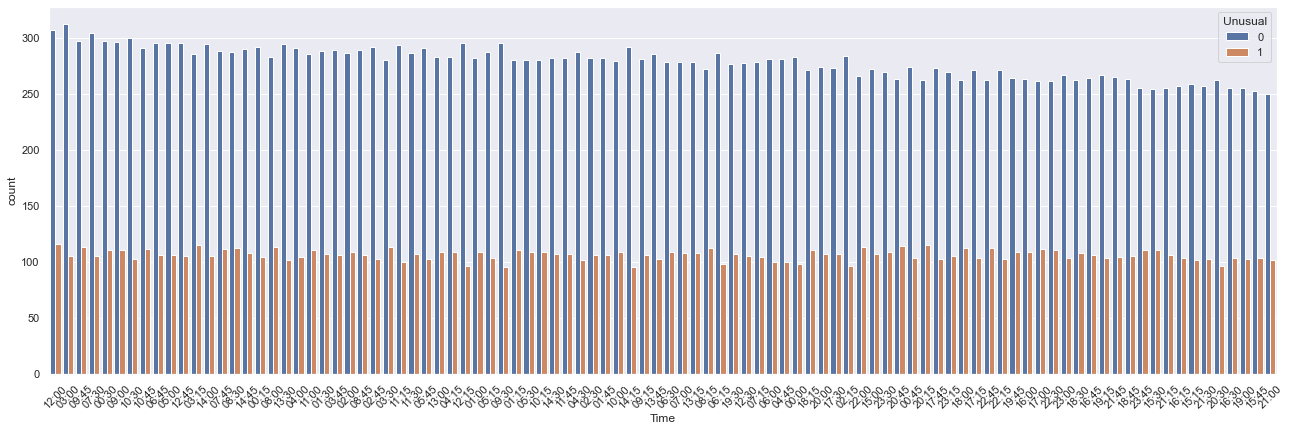

In [29]:
_cat_count_plot(train_df, 'Time', 'Unusual')

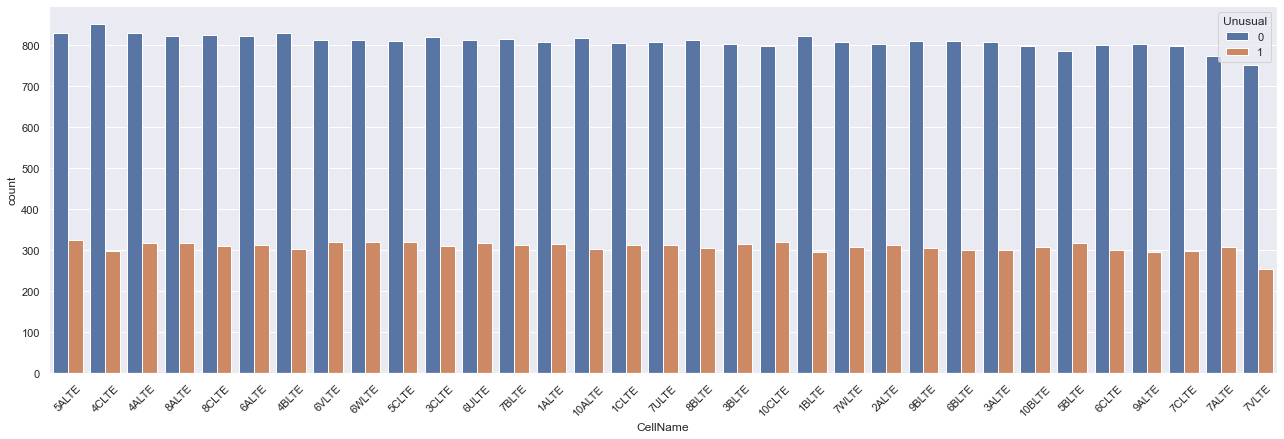

In [30]:
_cat_count_plot(train_df, 'CellName', 'Unusual')

**Numerical EDA**

In [31]:
numerical_data = train_df[['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL',
                           'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'maxUE_DL', 'maxUE_UL', 'Unusual']]

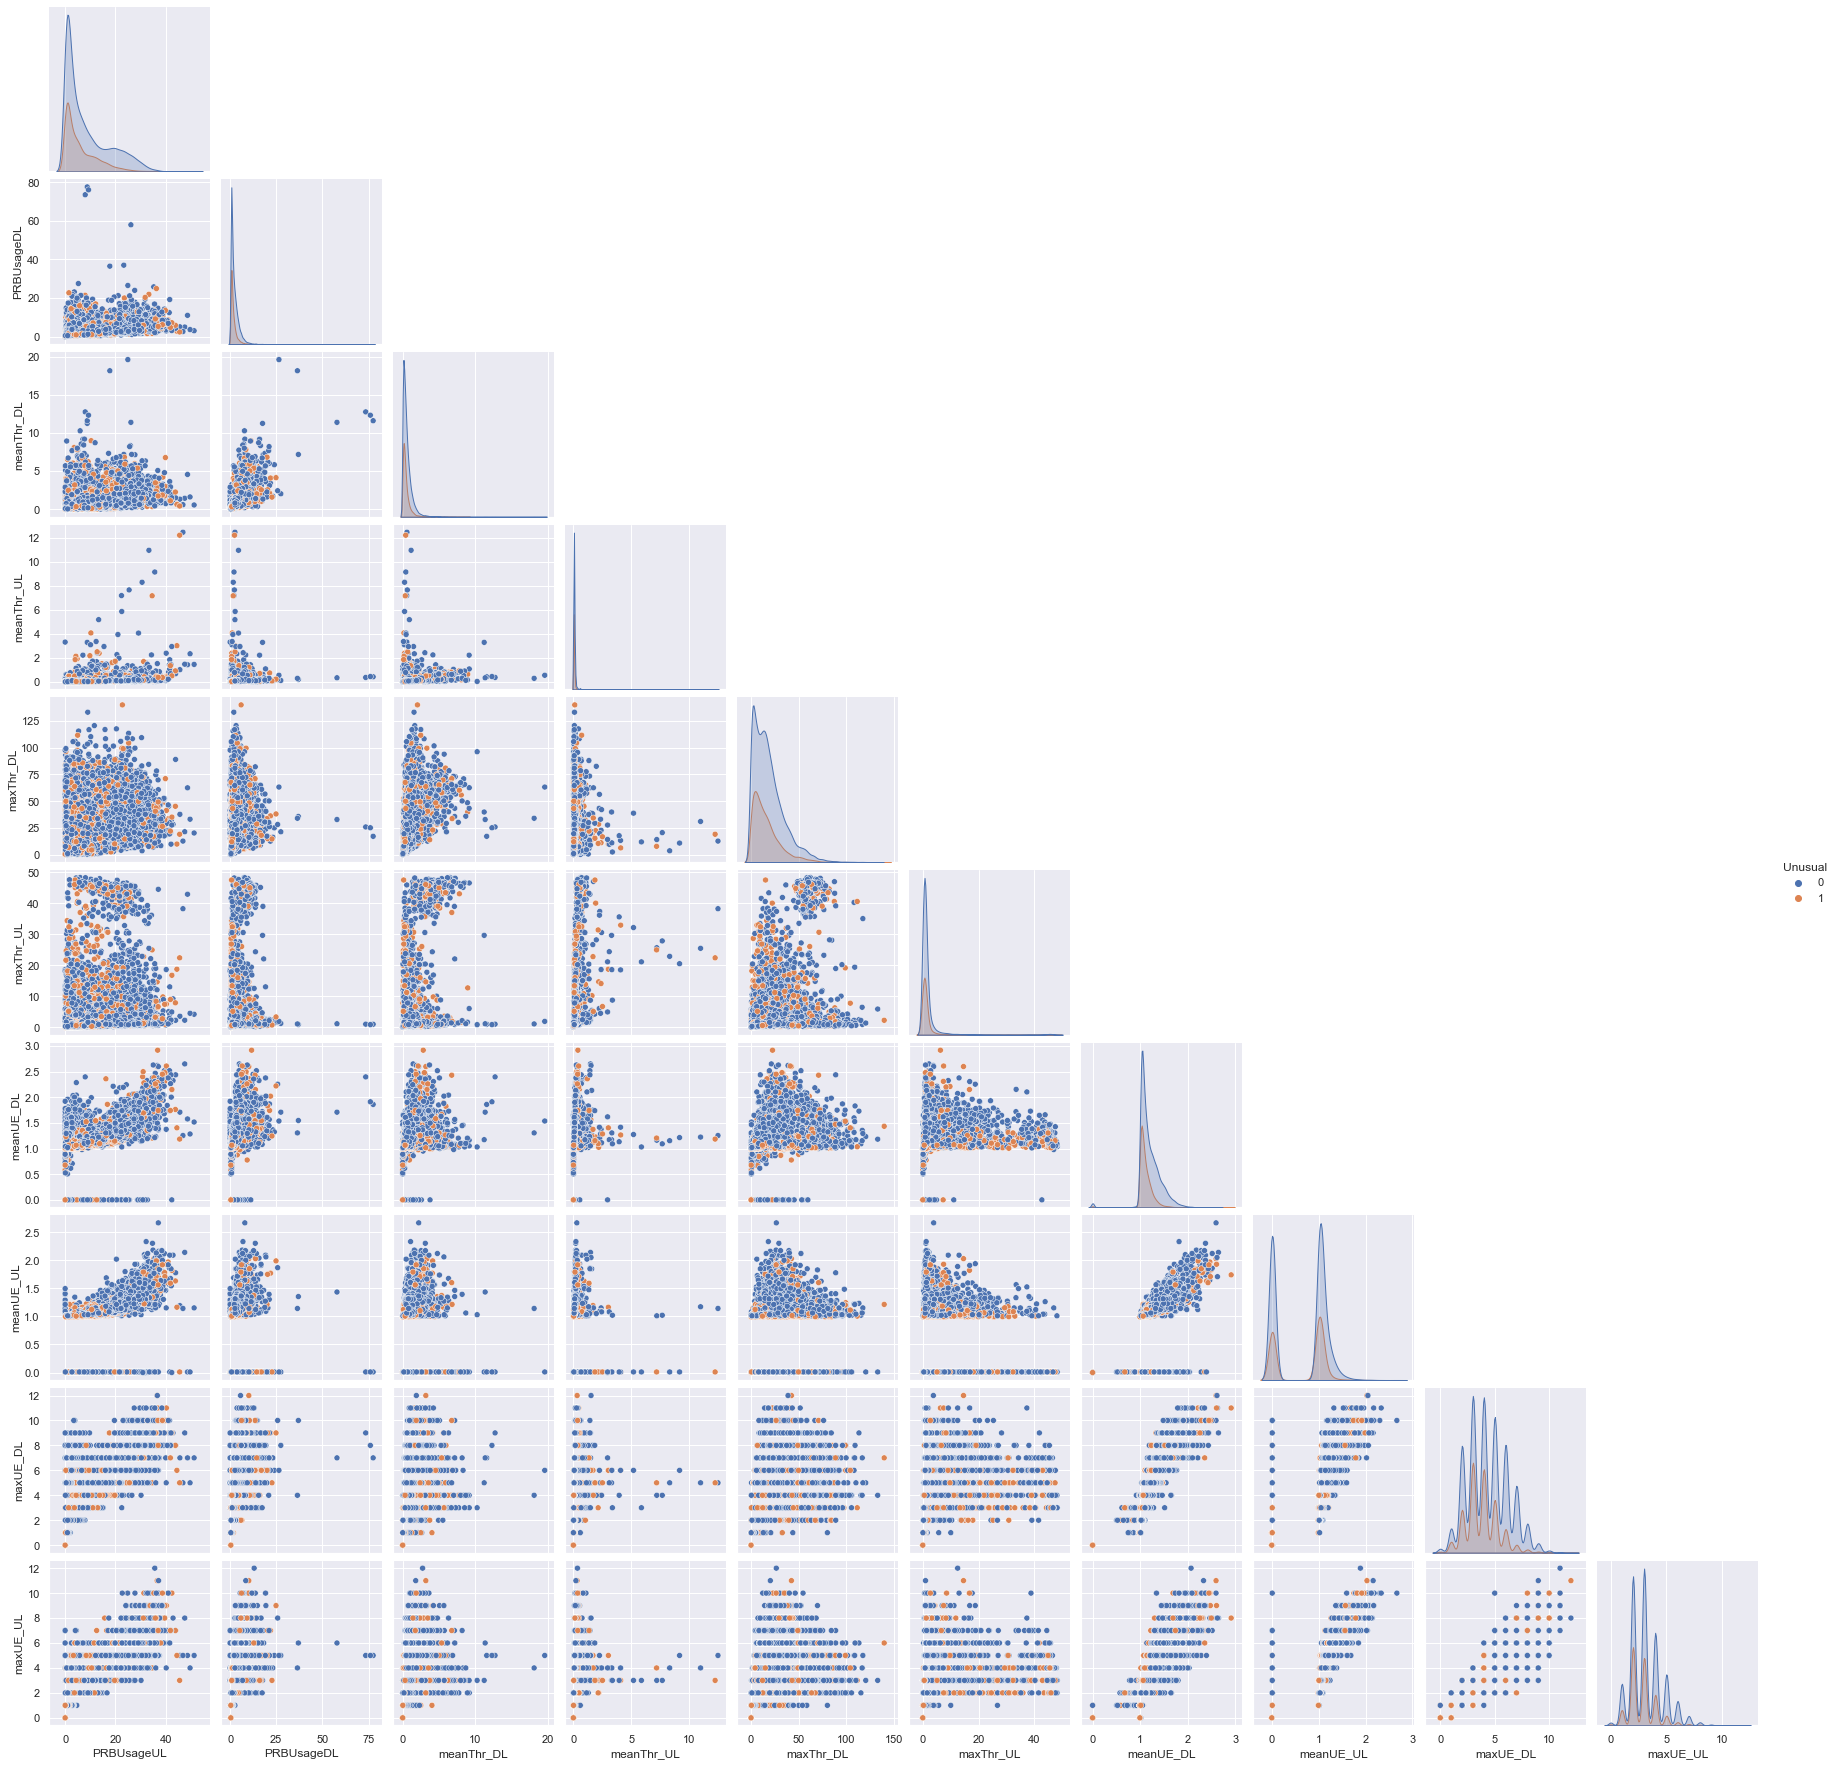

In [32]:
sns.pairplot(numerical_data, hue='Unusual', corner=True)

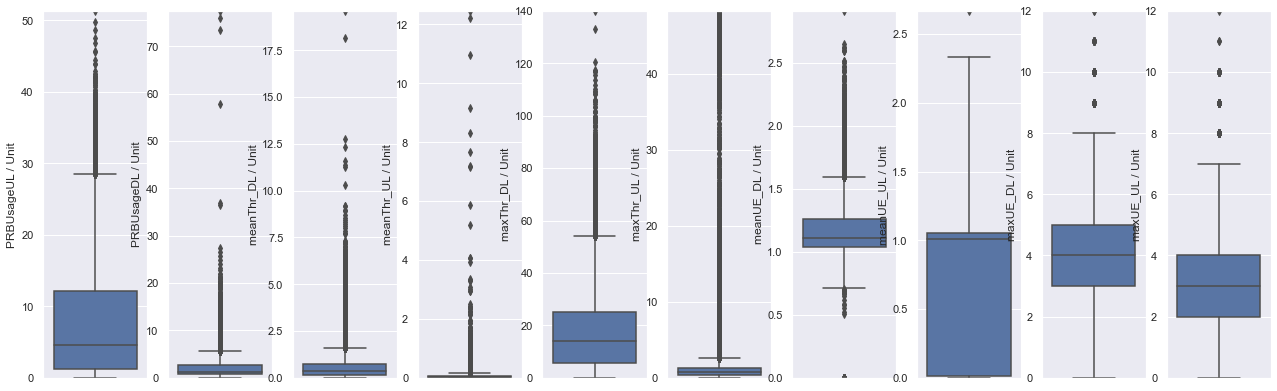

In [33]:
# create boxplot with a different y scale for different rows
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(22, 6.75)})


selection = numerical_data.select_dtypes('float').columns
fig, axes = plt.subplots(1, len(selection))
for i, col in enumerate(selection):
    ax = sns.boxplot(y=numerical_data[col], ax=axes.flatten()[i])
    ax.set_ylim(numerical_data[col].min(), numerical_data[col].max())
    ax.set_ylabel(col + ' / Unit')
plt.show()

## Anomaly Detection Algorithm Application
**How to use Statistics to Identify Outliers**
- Standard Deviation Method
- Interquartile Range Method
- Automatic Outlier Detection <br>

**Reference** <br>
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ <br>

**Standard Deviation Method**

**One-Class Support Vector Machines** <br>

**Isolation Forest** <br>
https://www.bmc.com/blogs/outlier-and-anomaly-detection/

**Local Outlier Factor** <br>

**Elliptic Envelope** <br>

**DBSCAN** <br>

**Multivariate anomalie detection** <br>

**Conformal Anomaly Detection & Conformal Prediction Framework** <br>
https://towardsdatascience.com/detecting-weird-data-conformal-anomaly-detection-20afb36c7bcd

**Other Resources** <br>
https://machinelearningmastery.com/one-class-classification-algorithms/ <br>
https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf <br>
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/ <br>
https://towardsdatascience.com/identifying-outliers-with-local-outlier-probabilities-2b5781e86e01#:~:text=By%20comparing%20the%20local%20density,to%20their%20Local%20Outlier%20Probability.

## Save Results and Generate Final Results
https://towardsdatascience.com/organize-your-data-and-models-using-the-object-oriented-programming-and-pickle-876a6654494

## Usecases
https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8 <br>
https://towardsdatascience.com/unsupervised-machine-learning-approaches-for-outlier-detection-in-time-series-using-python-5759c6394e19 <br>
https://medium.com/pinterest-engineering/building-a-real-time-anomaly-detection-system-for-time-series-at-pinterest-a833e6856ddd <br>

In [36]:
%load_ext watermark

ModuleNotFoundError: No module named 'watermark'